--- Running Block 1: Initial Setup & Mapping Generation ---
Generating the first 40 prime numbers...
Prime generation complete.
Mapped 40 symptoms to 40 primes.
Calculating SQFs, building inverted index, and precomputing constraints...
--- Block 1 Setup Complete (0.0011 seconds) ---

--- Starting Block 2: Application Logic ---

        Enhanced Symptom Checker (Optimized Version)
 Includes Precomputed Constraints, Inverted Index, Cached Primes

*** DISCLAIMER ***
This tool is for informational and demonstrational purposes ONLY...
If you think you may have a medical emergency, call 911 immediately.
Enter patient's age: 18
Enter patient's biological sex (Male/Female/Other): Male

Patient characteristics recorded: Age 18, Biological Sex (for filtering): M
Filtering diseases based on patient info...
Filtering complete (9 applicable diseases found in 0.0000 seconds).

                       LEGEND / HASH MAP (Rare Diseases Included)

--- Symptom Primes (Full Set) ---
  2     -> Abdominal pa

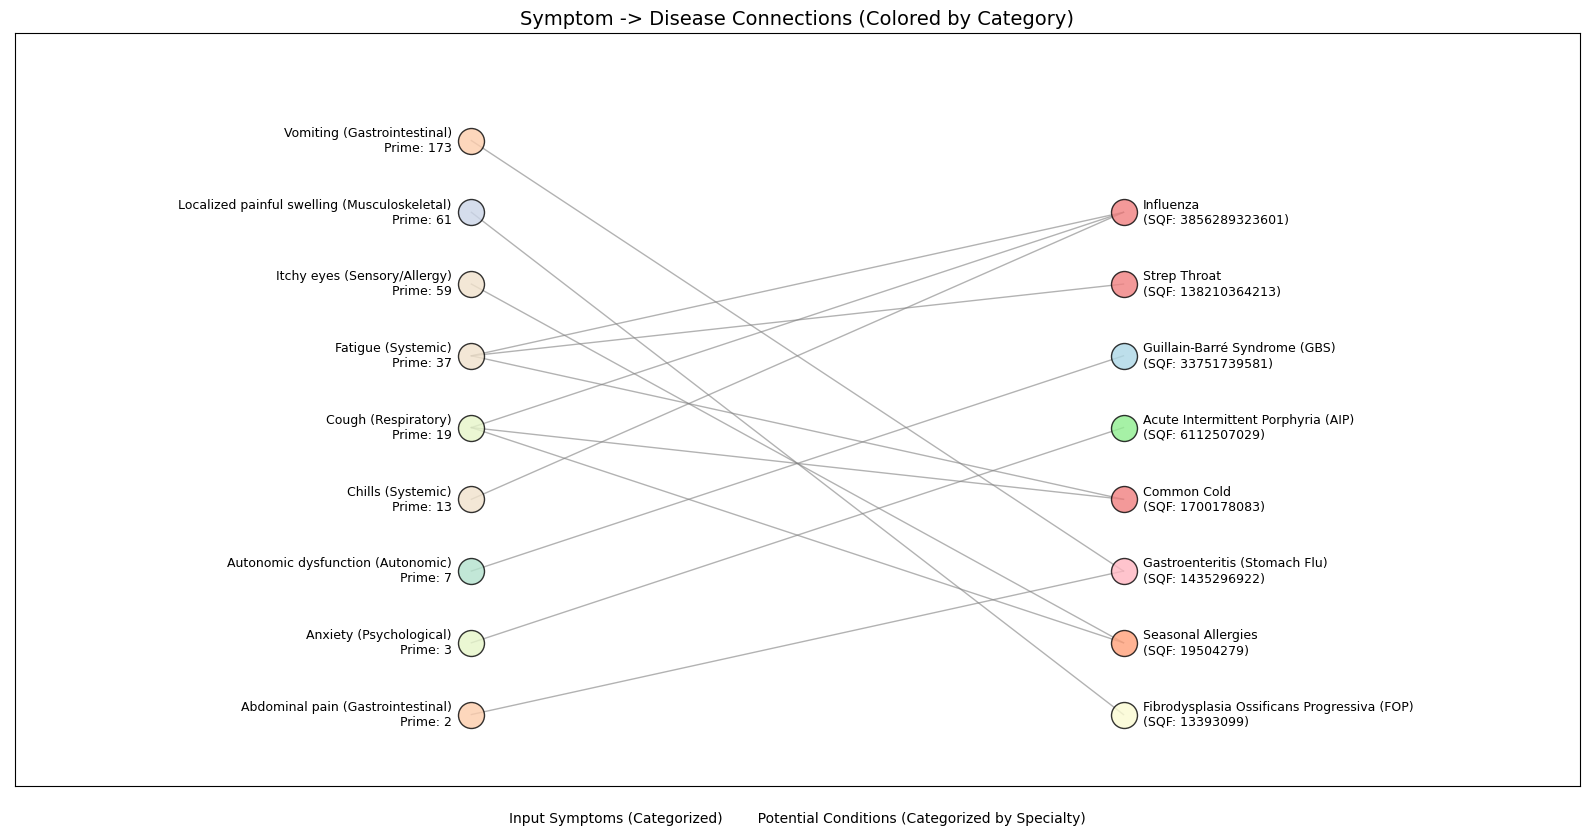

--------------------------------------------------------------------------------


In [ ]:
# -*- coding: utf-8 -*-
# --- Common Dependencies (Used in Both Blocks) ---
from collections import defaultdict
import math
import sys
import time # To potentially show optimization effect (optional)

# Attempt to import matplotlib (Needed in Block 2)
try:
    import matplotlib.pyplot as plt
    matplotlib_available = True
    # Define some colors for categories (add more as needed)
    category_colors = {
        "Infectious Disease/Primary Care": 'lightcoral',
        "Allergy/Immunology": 'lightsalmon',
        "Neurology": 'lightblue',
        "Metabolic/Genetic": 'lightgreen',
        "Musculoskeletal/Genetic": 'lightgoldenrodyellow',
        "Gastroenterology": 'lightpink',
        "Urology": 'plum',
        "Default": 'lightgrey'
    }
except ImportError:
    matplotlib_available = False
    category_colors = {}
    # Warning printed in Block 2 if needed


# =============================================================================
# --- BLOCK 1: SETUP, DATA DEFINITION & PRECOMPUTATION ---
# =============================================================================
# This block runs once: defines data, generates primes (cached in list),
# calculates global mappings, builds inverted index, and precomputes constraints.

print("--- Running Block 1: Initial Setup & Mapping Generation ---")
start_block1 = time.time()

# --- Prime Number Generation Helper (Reinstated) ---
def is_prime(num):
    if num < 2: return False
    for i in range(2, int(math.sqrt(num)) + 1):
        if num % i == 0: return False
    return True

def generate_primes(count):
    primes = []
    num = 2
    print(f"Generating the first {count} prime numbers...")
    while len(primes) < count:
        if is_prime(num):
            primes.append(num)
        num += 1
    print("Prime generation complete.")
    return primes

# --- Data Definitions ---
# (Data structures disease_data, symptom_categories, disease_action_plan remain unchanged)
# Using truncated data from previous example for brevity
disease_data = {
    "Common Cold": {"symptoms": {"Cough", "Sore throat", "Runny nose", "Sneezing", "Fatigue"}, "category": "Infectious Disease/Primary Care", "constraints": {"min_age": None, "max_age": None, "sex": None}},
    "Influenza": {"symptoms": {"Fever", "Cough", "Sore throat", "Runny nose", "Body aches", "Fatigue", "Headache", "Chills"}, "category": "Infectious Disease/Primary Care", "constraints": {"min_age": None, "max_age": None, "sex": None}},
    "Strep Throat": {"symptoms": {"Fever", "Sore throat", "Headache", "Swollen Tonsils", "Fatigue", "Nausea"}, "category": "Infectious Disease/Primary Care", "constraints": {"min_age": None, "max_age": None, "sex": None}},
    "Seasonal Allergies": {"symptoms": {"Runny nose", "Sneezing", "Itchy eyes", "Cough"}, "category": "Allergy/Immunology", "constraints": {"min_age": None, "max_age": None, "sex": None}},
    "Gastroenteritis (Stomach Flu)": {"symptoms": {"Nausea", "Vomiting", "Diarrhea", "Abdominal pain", "Fever", "Headache"}, "category": "Gastroenterology", "constraints": {"min_age": None, "max_age": None, "sex": None}},
    "Acute Intermittent Porphyria (AIP)": {"symptoms": {"Severe abdominal pain", "Nausea", "Muscle weakness", "Confusion", "Anxiety", "Tachycardia"}, "category": "Metabolic/Genetic", "constraints": {"min_age": 15, "max_age": 50, "sex": None}},
    "Creutzfeldt-Jakob Disease (CJD)": {"symptoms": {"Rapid cognitive decline", "Memory loss", "Myoclonus", "Ataxia", "Confusion", "Visual disturbances"}, "category": "Neurology", "constraints": {"min_age": 50, "max_age": None, "sex": None}},
    "Fibrodysplasia Ossificans Progressiva (FOP)": {"symptoms": {"Malformed great toe", "Localized painful swelling", "Reduced joint mobility", "Difficulty breathing"}, "category": "Musculoskeletal/Genetic", "constraints": {"min_age": None, "max_age": None, "sex": None}},
    "Fatal Familial Insomnia (FFI)": {"symptoms": {"Progressive severe insomnia", "Panic attacks", "Hallucinations", "Ataxia", "Memory loss", "Autonomic dysfunction"}, "category": "Neurology", "constraints": {"min_age": 30, "max_age": 60, "sex": None}},
    "Guillain-Barré Syndrome (GBS)": {"symptoms": {"Muscle weakness", "Tingling in extremities", "Unsteady walk (Ataxia)", "Difficulty breathing", "Autonomic dysfunction", "Pain"}, "category": "Neurology", "constraints": {"min_age": None, "max_age": None, "sex": None}},
    "Prostatitis": {"symptoms": {"Painful urination", "Difficulty urinating", "Pain in groin/pelvis", "Flu-like symptoms"}, "category": "Urology", "constraints": {"min_age": None, "max_age": None, "sex": "M"}}
}
symptom_categories = {
    "Fever": "Systemic", "Fatigue": "Systemic", "Chills": "Systemic", "Body aches": "Musculoskeletal", "Pain": "General", "Autonomic dysfunction": "Autonomic", "Tachycardia": "Cardiovascular", "Panic attacks": "Psychological", "Anxiety": "Psychological", "Flu-like symptoms": "Systemic", "Headache": "Neurological", "Sore throat": "ENT", "Swollen Tonsils": "ENT", "Confusion": "Neurological", "Memory loss": "Neurological", "Rapid cognitive decline": "Neurological", "Myoclonus": "Neurological", "Ataxia": "Neurological", "Unsteady walk (Ataxia)": "Neurological", "Visual disturbances": "Sensory", "Itchy eyes": "Sensory/Allergy", "Progressive severe insomnia": "Neurological", "Hallucinations": "Neurological", "Tingling in extremities": "Neurological", "Cough": "Respiratory", "Sneezing": "Respiratory/Allergy", "Runny nose": "Respiratory/Allergy", "Difficulty breathing": "Respiratory", "Nausea": "Gastrointestinal", "Vomiting": "Gastrointestinal", "Diarrhea": "Gastrointestinal", "Abdominal pain": "Gastrointestinal", "Severe abdominal pain": "Gastrointestinal", "Muscle weakness": "Musculoskeletal", "Malformed great toe": "Musculoskeletal/Genetic", "Localized painful swelling": "Musculoskeletal", "Reduced joint mobility": "Musculoskeletal", "Painful urination": "Urogenital", "Difficulty urinating": "Urogenital", "Pain in groin/pelvis": "Urogenital"
}
disease_action_plan = {
    "Common Cold": "Action: Rest, hydrate, OTC remedies. See Primary Care/GP if severe/prolonged.", "Influenza": "Action: Consult Primary Care/GP promptly for diagnosis/treatment. Rest/fluids.", "Strep Throat": "Action: See Primary Care/GP for testing/antibiotics.", "Seasonal Allergies": "Action: Avoid triggers, OTC antihistamines. Consult Allergist if severe.", "Gastroenteritis (Stomach Flu)": "Action: Hydration focus. See Primary Care/GP or ER if severe dehydration/pain/bloody stools.", "Acute Intermittent Porphyria (AIP)": "Action: URGENT medical evaluation (ER/Specialist - e.g., Hematologist/Geneticist) required.", "Creutzfeldt-Jakob Disease (CJD)": "Action: URGENT Neurologist evaluation required.", "Fibrodysplasia Ossificans Progressiva (FOP)": "Action: Specialist consultation (Geneticist/Orthopedist/Rheumatologist) required.", "Fatal Familial Insomnia (FFI)": "Action: URGENT Neurologist/Sleep Specialist evaluation required.", "Guillain-Barré Syndrome (GBS)": "Action: URGENT medical/Neurologist evaluation (likely ER/Hospital) required.", "Prostatitis": "Action: Consult a Urologist or Primary Care/GP.", "Default": "Action: Consult a qualified healthcare professional for diagnosis and treatment."
}

# --- Global Mapping & Precomputation ---

# 1. Prime Generation & Mapping (Primes implicitly cached in primes_list)
all_unique_symptoms = sorted(list(set(symptom for data in disease_data.values() for symptom in data["symptoms"])))
required_primes = len(all_unique_symptoms)
primes_list = generate_primes(required_primes) # Generated ONCE and stored
symptom_to_prime = {symptom: primes_list[i] for i, symptom in enumerate(all_unique_symptoms)}
prime_to_symptom = {prime: symptom for symptom, prime in symptom_to_prime.items()}
print(f"Mapped {len(all_unique_symptoms)} symptoms to {len(primes_list)} primes.")

# 2. Calculate Global SQF & Build Inverted Index & Precompute Constraints
print("Calculating SQFs, building inverted index, and precomputing constraints...")
all_disease_to_sqf = {}
prime_to_diseases_index = defaultdict(set) # Symptom Prime -> Set of Disease Names
diseases_for_male = set()
diseases_for_female = set()
diseases_for_all_sexes = set()

for disease, data in disease_data.items():
    sqf_integer = 1
    for symptom in data["symptoms"]:
        prime = symptom_to_prime.get(symptom)
        if prime:
            sqf_integer *= prime
            prime_to_diseases_index[prime].add(disease) # Add to inverted index
    all_disease_to_sqf[disease] = sqf_integer

    sex_constraint = data["constraints"].get("sex")
    if sex_constraint == 'M': diseases_for_male.add(disease)
    elif sex_constraint == 'F': diseases_for_female.add(disease)
    else: diseases_for_all_sexes.add(disease)

end_block1 = time.time()
print(f"--- Block 1 Setup Complete ({end_block1 - start_block1:.4f} seconds) ---")
# Variables available for Block 2: disease_data, symptom_categories, disease_action_plan,
# symptom_to_prime, prime_to_symptom, all_disease_to_sqf, prime_to_diseases_index,
# diseases_for_male, diseases_for_female, diseases_for_all_sexes


# =============================================================================
# --- BLOCK 2: APPLICATION LOGIC (Using Precomputed Data) ---
# =============================================================================

print("\n--- Starting Block 2: Application Logic ---")

# --- Helper Functions for Block 2 ---

# --- CORRECTED get_patient_info function ---
def get_patient_info():
    """Gets Age and Biological Sex from the user."""
    age = -1 # Initialize age to an invalid value
    while True: # Loop for age input
        try:
            age_input = input("Enter patient's age: ")
            age = int(age_input)
            if 0 <= age <= 120:
                break # Valid age received, exit age loop
            else:
                print("Please enter a realistic age (0-120).")
        except ValueError:
            print("Invalid input. Please enter age as a number.")
        # If loop continues, it means input was invalid or out of range

    sex_constraint = None # Initialize
    while True: # Loop for sex input
        sex = input("Enter patient's biological sex (Male/Female/Other): ").strip().capitalize()
        if sex == 'Male':
            sex_constraint = 'M'
            break # Valid sex received, exit sex loop
        elif sex == 'Female':
            sex_constraint = 'F'
            break # Valid sex received, exit sex loop
        elif sex == 'Other':
             sex_constraint = None
             print("Note: Filtering for sex-specific conditions inactive for 'Other'.")
             break # Valid input received, exit sex loop
        else:
            print("Please enter 'Male', 'Female', or 'Other'.")
        # Loop continues if input is invalid

    return {"age": age, "sex": sex_constraint}


def filter_diseases_by_patient(patient_info, full_disease_data):
    """Filters diseases using precomputed sex sets and then applies age filter."""
    # (Unchanged - uses precomputed sets correctly)
    print("Filtering diseases based on patient info...")
    start_filter = time.time()
    age = patient_info["age"]
    sex = patient_info["sex"] # 'M', 'F', or None
    candidate_diseases = diseases_for_all_sexes.copy()
    if sex == 'M': candidate_diseases.update(diseases_for_male)
    elif sex == 'F': candidate_diseases.update(diseases_for_female)

    final_filtered_disease_data = {}
    for disease_name in candidate_diseases:
        if disease_name not in full_disease_data: continue
        data = full_disease_data[disease_name]
        constraints = data["constraints"]
        if constraints["min_age"] is not None and age < constraints["min_age"]: continue
        if constraints["max_age"] is not None and age > constraints["max_age"]: continue
        final_filtered_disease_data[disease_name] = data

    end_filter = time.time()
    print(f"Filtering complete ({len(final_filtered_disease_data)} applicable diseases found in {end_filter - start_filter:.4f} seconds).")
    return final_filtered_disease_data

def calculate_disease_matches_optimized(user_symptom_primes, filtered_disease_names, index):
    """Counts matches using the inverted index (prime -> diseases)."""
    # (Unchanged - uses inverted index correctly)
    start_match = time.time()
    match_counts = defaultdict(int)
    if not user_symptom_primes: return {}
    for prime in user_symptom_primes:
        diseases_with_symptom = index.get(prime, set())
        for disease in diseases_with_symptom:
            if disease in filtered_disease_names: # Check against filtered set
                match_counts[disease] += 1
    end_match = time.time()
    print(f"Matching complete using inverted index ({end_match - start_match:.4f} seconds).")
    return {d: c for d, c in match_counts.items() if c > 0}


def print_mappings_display(prime_map, filtered_disease_data_display):
    """Prints legends for display, using filtered disease context."""
    # (Unchanged)
    print("\n" + "="*80); print("                       LEGEND / HASH MAP (Rare Diseases Included)"); print("="*80)
    print("\n--- Symptom Primes (Full Set) ---")
    max_symptom_len = max(len(s) for s in prime_map.values()) if prime_map else 10
    items_per_line = 2; sorted_symptoms = sorted(prime_map.items())
    for i in range(0, len(sorted_symptoms), items_per_line):
        line = ""
        for j in range(items_per_line):
            if i + j < len(sorted_symptoms):
                prime, symptom = sorted_symptoms[i+j]; symptom_cat = symptom_categories.get(symptom, 'Unknown')
                line += f"  {prime:<5} -> {symptom:<{max_symptom_len}} ({symptom_cat:<15}) "
        print(line)
    print("\n--- Disease SQF Integers (Filtered based on patient characteristics) ---")
    filtered_sqf_map_display = defaultdict(list)
    for disease_name, data in filtered_disease_data_display.items():
         sqf = all_disease_to_sqf.get(disease_name);
         if sqf: filtered_sqf_map_display[sqf].append(f"{disease_name} [{data.get('category','?')}]")
    if not filtered_sqf_map_display: print("  (No diseases applicable based on patient characteristics)")
    else:
        for sqf, disease_details in sorted(filtered_sqf_map_display.items()): print(f"  {sqf:<15} -> {', '.join(disease_details)}")
    print("="*80 + "\n")

def visualize_graph_enhanced(user_primes, matched_sqfs, prime_map, sqf_disease_map, filtered_disease_data_vis):
    """Visualizes graph with nodes colored by category."""
    # (Unchanged)
    if not matplotlib_available: print("\nVisualization unavailable..."); return
    if not user_primes or not matched_sqfs: print("\nCannot visualize graph..."); return
    if 'plt' not in globals(): print("\nVisualization unavailable..."); return
    fig, ax = plt.subplots(figsize=(16, max(len(user_primes), len(matched_sqfs)) * 0.8 + 2))
    x_left, x_right = 0, 1; plot_primes = sorted(list(set(user_primes))); plot_sqfs = sorted(list(set(matched_sqfs)))
    y_coords_left = {prime: i for i, prime in enumerate(plot_primes)}; y_coords_right = {sqf: i for i, sqf in enumerate(plot_sqfs)}
    max_y = max(len(y_coords_left), len(y_coords_right)) if (y_coords_left or y_coords_right) else 1
    disease_categories_in_graph = {}
    for sqf in plot_sqfs:
        cat = "Default"
        for disease_name, data in filtered_disease_data_vis.items():
             if all_disease_to_sqf.get(disease_name) == sqf: cat = data.get("category", "Default"); break
        disease_categories_in_graph[sqf] = cat
    symptom_color_map = plt.get_cmap('Pastel2'); unique_symptom_cats = sorted(list(set(symptom_categories.values())))
    s_cat_norm = {cat: i / len(unique_symptom_cats) for i, cat in enumerate(unique_symptom_cats)} if unique_symptom_cats else {}
    for prime, i in y_coords_left.items():
        symptom = prime_map.get(prime, '?'); s_cat = symptom_categories.get(symptom, "Unknown"); s_color = symptom_color_map(s_cat_norm.get(s_cat, 0.5))
        label = f"{symptom} ({s_cat})\nPrime: {prime}"
        ax.scatter(x_left, i, color=s_color, s=350, zorder=3, edgecolors='black', alpha=0.8); ax.text(x_left - 0.03, i, label, ha='right', va='center', fontsize=9)
    for sqf, j in y_coords_right.items():
        disease_names = "\n".join(sqf_disease_map.get(sqf, ['?'])); d_cat = disease_categories_in_graph.get(sqf, "Default"); d_color = category_colors.get(d_cat, category_colors["Default"])
        label = f"{disease_names}\n(SQF: {sqf})"
        ax.scatter(x_right, j, color=d_color, s=350, zorder=3, edgecolors='black', alpha=0.8); ax.text(x_right + 0.03, j, label, ha='left', va='center', fontsize=9)
    for p, i in y_coords_left.items():
        for n, j in y_coords_right.items():
             if n % p == 0: ax.plot([x_left, x_right], [i, j], color='grey', linewidth=1.0, zorder=1, alpha=0.6)
    ax.set_xticks([]); ax.set_yticks([]); ax.set_xlim(-0.7, 1.7); ax.set_ylim(-1, max_y + 0.5)
    ax.set_title("Symptom -> Disease Connections (Colored by Category)", fontsize=14)
    ax.set_xlabel("Input Symptoms (Categorized)        Potential Conditions (Categorized by Specialty)", labelpad=15)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95]); plt.show(block=True)


# --- Main Application Function ---
def run_symptom_checker():
    """Runs the main interactive symptom checking application using optimized methods."""
    # --- Initial Setup & Disclaimer ---
    print("\n" + "="*80); print("        Enhanced Symptom Checker (Optimized Version)"); print(" Includes Precomputed Constraints, Inverted Index, Cached Primes"); print("="*80)
    print("\n*** DISCLAIMER ***"); print("This tool is for informational and demonstrational purposes ONLY..."); print("If you think you may have a medical emergency, call 911 immediately."); print("="*80)
    if not matplotlib_available: print("\nWarning: matplotlib not found..."); print("Install using: pip install matplotlib")

    # --- Get Patient Info (Once) ---
    patient_info = get_patient_info()
    print(f"\nPatient characteristics recorded: Age {patient_info['age']}, Biological Sex (for filtering): {patient_info['sex'] or 'N/A'}")

    # --- Filter Diseases (Uses precomputation) ---
    filtered_disease_data = filter_diseases_by_patient(patient_info, disease_data)
    if not filtered_disease_data: print("No diseases match patient characteristics. Exiting."); return
    filtered_disease_names_set = set(filtered_disease_data.keys())
    filtered_sqf_to_disease_session = defaultdict(list)
    for disease_name in filtered_disease_names_set:
        sqf = all_disease_to_sqf.get(disease_name)
        if sqf: filtered_sqf_to_disease_session[sqf].append(disease_name)

    # --- Print Mappings ---
    print_mappings_display(prime_to_symptom, filtered_disease_data)

    # --- Main Loop ---
    while True:
        final_input_vector = []; final_output_vector = []; valid_symptoms_found = []
        try:
            print("-" * 80)
            input_str = input("Enter symptom prime numbers (comma-separated): ")
            raw_inputs = [s.strip() for s in input_str.split(',') if s.strip()]
            if not raw_inputs:
                  print("No input provided.");
                  if input("\nTry again? (yes/no): ").strip().lower() != 'yes': break
                  else: continue

            user_symptom_primes = []
            invalid_inputs = []
            for val_str in raw_inputs:
                try:
                    prime_candidate = int(val_str)
                    if prime_candidate in prime_to_symptom:
                        if prime_candidate not in user_symptom_primes: user_symptom_primes.append(prime_candidate); valid_symptoms_found.append(prime_to_symptom[prime_candidate])
                    else: invalid_inputs.append(f"{prime_candidate} (Not valid/known)")
                except ValueError: invalid_inputs.append(f"'{val_str}' (Not integer)")

            user_symptom_primes.sort()
            if invalid_inputs: print(f"\nWarning: Invalid inputs: {', '.join(invalid_inputs)}")
            if not user_symptom_primes:
                print("No valid symptom primes provided.");
                if input("\nTry again? (yes/no): ").strip().lower() != 'yes': break
                else: continue

            print(f"\nProcessing symptoms: {', '.join(sorted(valid_symptoms_found))} (Primes: {user_symptom_primes})")
            final_input_vector = list(user_symptom_primes)

            # Calculate matches using OPTIMIZED function
            disease_matches = calculate_disease_matches_optimized(user_symptom_primes, filtered_disease_names_set, prime_to_diseases_index)

            if not disease_matches:
                print("\nBased on input, no matching conditions found in applicable set.")
                final_output_vector = []
            else:
                prioritized_diseases = sorted(disease_matches.items(), key=lambda item: (-item[1], item[0]))
                print("\n" + "="*80); print("                       RESULTS, CATEGORIES & ACTIONS"); print("="*80)
                symptom_names_str = ", ".join(sorted(valid_symptoms_found)); disease_names_str = ", ".join([d[0] for d in prioritized_diseases])
                print(f"\nBased on symptoms: {symptom_names_str}")
                print(f"Potential conditions (filtered for patient age {patient_info['age']}, sex {patient_info['sex'] or 'N/A'}) to discuss with a healthcare professional:")
                print(f" -> {disease_names_str}\n"); print("--- Details (Category & Suggested Actions - Not Medical Advice) ---")

                matched_disease_sqfs_set = set()
                for disease, count in prioritized_diseases:
                    disease_info = filtered_disease_data.get(disease, {}); category = disease_info.get("category", "?")
                    sqf = all_disease_to_sqf.get(disease, 'N/A'); action = disease_action_plan.get(disease, disease_action_plan["Default"])
                    print(f"\n* {disease} (Category: {category})"); print(f"  Matches {count} symptom(s) (SQF: {sqf})"); print(f"  {action}")
                    if sqf != 'N/A': matched_disease_sqfs_set.add(sqf)
                print("---")

                matched_disease_sqfs = sorted(list(matched_disease_sqfs_set)); final_output_vector = list(matched_disease_sqfs)

                if matplotlib_available:
                    try:
                        print("\nGenerating connections graph (nodes colored by category)...")
                        visualize_graph_enhanced(user_symptom_primes, matched_disease_sqfs, prime_to_symptom, filtered_sqf_to_disease_session, filtered_disease_data)
                    except Exception as e: print(f"\nError generating visualization: {e}")
                else: print("\n(Visualization skipped - matplotlib not available)")

        except Exception as e: print(f"\nAn unexpected error occurred: {e}")

        print("-" * 80)
        restart = input("\nAnalyze another set of symptoms for this patient? (yes/no): ").strip().lower()
        if restart != 'yes': print("\nExiting..."); break

# --- Entry Point ---
if __name__ == "__main__":
    # This ensures Block 1 runs, then Block 2's main function is called.
    run_symptom_checker()